# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Based on the dataset's visualizations and calculations, the most common characteristics of a popular song are:

* BPM: 80-130
* Mode: Major
* Danceability: 55-85
* Energy: 50-80
* Speechiness: 5-10
* Acoustiness: 0-15
In summary, a "guaranteed smash hit" is most likely an energetic, moderately fast, danceable song in a major key that has a heavy mix of electronic production with some acoustic features mixed in.


Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

	artist(s)_name	track_name	streams	in_spotify_charts	in_spotify_playlists	popular
518	Doja Cat	Need To Know	1.042568e+09	0	6672	True
660	Yung Lean	Ginseng Strip 2002	2.407700e+08	0	4310	False


One of the songs was popular but one wasn't.


Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

Blinding Lights seemed to have some values within the expected range for a smash hit, but many outside of it.

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("spotify-2023.csv", encoding="ISO-8859-1")

rename_map = {'danceability_%': 'danceability',
              'energy_%': 'energy',
              'speechiness_%': 'speechiness',
              'acousticness_%': 'acousticness',
              'valence_%': 'valence'
             }

df = df.rename(columns=rename_map)
num_cols = ['bpm', 'danceability', 'energy', 'speechiness',
            'acousticness', 'valence', 'streams', 'released_year',
            'released_month', 'released_day', 'artist_count', 
            'in_spotify_playlists', 'in_spotify_charts',
            'in_apple_playlists'
           ]

for i in num_cols:
    if i in df.columns:
        df[i] = pd.to_numeric(df[i], errors='coerce')

needed = ['bpm', 'key', 'mode', 'danceability', 'energy', 'speechiness', 'acousticness']
df_clean = df.dropna(subset=[i for i in needed if i in df.columns]).copy()

df_clean[needed + ['track_name', 'artist(s)_name', 'streams']].head()


,bpm,key,mode,danceability,energy,speechiness,acousticness,track_name,artist(s)_name,streams
0,125,B,Major,80,83,4,31,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703.0
1,92,C#,Major,71,74,4,7,LALA,Myke Towers,133716286.0
2,138,F,Major,51,53,6,17,vampire,Olivia Rodrigo,140003974.0
3,170,A,Major,55,72,15,11,Cruel Summer,Taylor Swift,800840817.0
4,144,A,Minor,65,80,6,14,WHERE SHE GOES,Bad Bunny,303236322.0


In [8]:
def annotate_stats(ax, series, as_percent=False):
    q25, q50, q75 = np.nanpercentile(series, [25, 50, 75])
    txt = f"Median: {q50:.1f}\nIQR: {q25:.1f} – {q75:.1f}"
    if as_percent:
        txt = f"Median: {q50:.0f}%\nIQR: {q25:.0f}% – {q75:.0f}%"
    ax.axvline(q50, linestyle='--')
    ax.text(0.98, 0.95, txt, transform=ax.transAxes, ha='right', va='top')

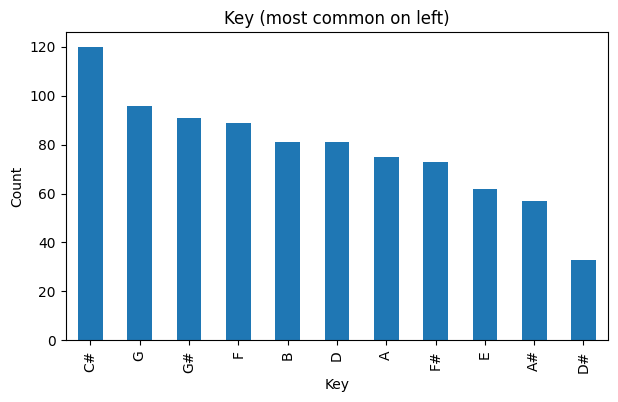

In [9]:
ax = df_clean['key'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(7,4))
ax.set_title('Key (most common on left)')
ax.set_xlabel('Key'); ax.set_ylabel('Count')
plt.show()

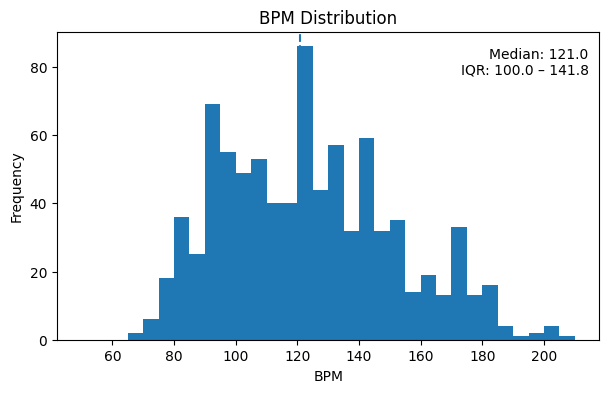

In [10]:
ax = df_clean['bpm'].plot(kind='hist', bins=range(50, 211, 5), figsize=(7,4))
ax.set_title('BPM Distribution')
ax.set_xlabel('BPM')
annotate_stats(ax, df_clean['bpm'])
plt.show()

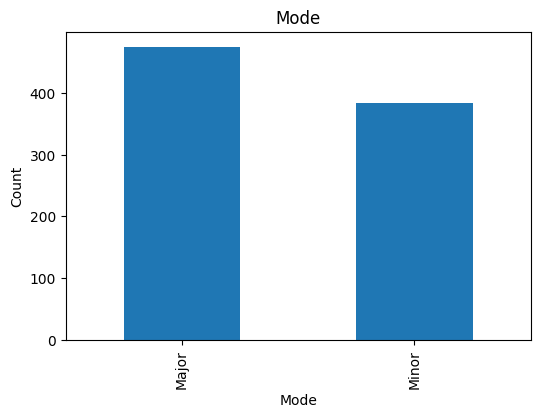

In [11]:
ax = df_clean['mode'].value_counts().plot(kind='bar', figsize=(6,4))
ax.set_title('Mode'); ax.set_xlabel('Mode'); ax.set_ylabel('Count')
plt.show()

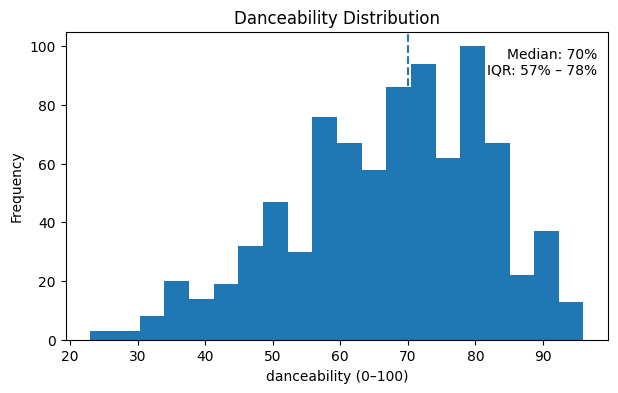

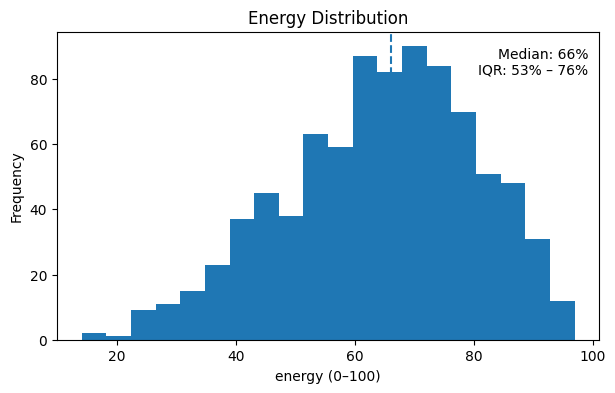

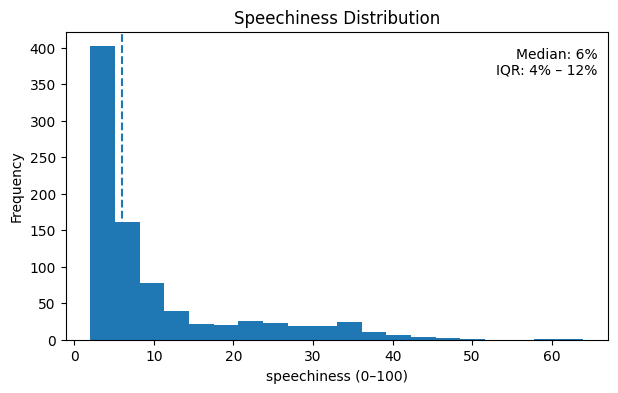

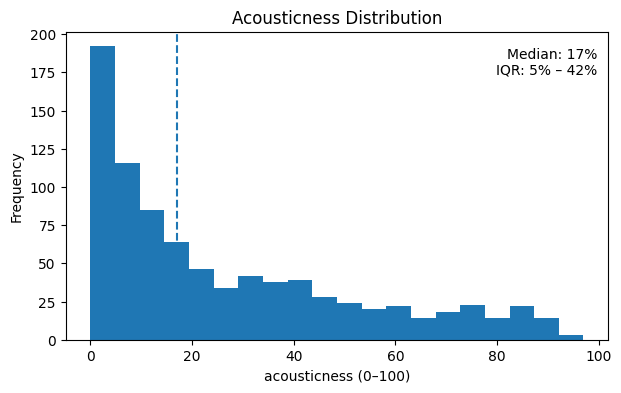

In [12]:
for col in ['danceability','energy','speechiness','acousticness']:
    ax = df_clean[col].plot(kind='hist', bins=20, figsize=(7,4))
    ax.set_title(f'{col.capitalize()} Distribution')
    ax.set_xlabel(f'{col} (0–100)')
    annotate_stats(ax, df_clean[col], as_percent=True)
    plt.show()

In [15]:
def pct_range(series, lo=25, hi=75):
    qlo, qhi = np.nanpercentile(series, [lo, hi])
    return (qlo, qhi)

typical = {
    'bpm_range': pct_range(df_clean['bpm'], 25, 75),
    'danceability_range': pct_range(df_clean['danceability'], 25, 75),
    'energy_range': pct_range(df_clean['energy'], 25, 75),
    'speechiness_range': pct_range(df_clean['speechiness'], 25, 75),
    'acousticness_range': pct_range(df_clean['acousticness'], 25, 75),
    'key_mode': {
        'key': df_clean['key'].mode().iat[0] if not df_clean['key'].mode().empty else None,
        'mode': df_clean['mode'].mode().iat[0] if not df_clean['mode'].mode().empty else None
    }
}
typical

{'bpm_range': (np.float64(100.0), np.float64(141.75)),
 'danceability_range': (np.float64(57.0), np.float64(78.0)),
 'energy_range': (np.float64(53.25), np.float64(76.0)),
 'speechiness_range': (np.float64(4.0), np.float64(12.0)),
 'acousticness_range': (np.float64(5.0), np.float64(42.0)),
 'key_mode': {'key': 'C#', 'mode': 'Major'}}

In [16]:
spec = {
    'bpm_min': typical['bpm_range'][0],
    'bpm_max': typical['bpm_range'][1],
    'dance_min': typical['danceability_range'][0],
    'dance_max': typical['danceability_range'][1],
    'energy_min': typical['energy_range'][0],
    'energy_max': typical['energy_range'][1],
    'speech_min': typical['speechiness_range'][0],
    'speech_max': typical['speechiness_range'][1],
    'acoust_min': typical['acousticness_range'][0],
    'acoust_max': typical['acousticness_range'][1],
    'key': typical['key_mode']['key'],
    'mode': typical['key_mode']['mode'],
}
spec

hits_like_spec = df_clean.loc[
    (df_clean['bpm'].between(spec['bpm_min'], spec['bpm_max'])) &
    (df_clean['danceability'].between(spec['dance_min'], spec['dance_max'])) &
    (df_clean['energy'].between(spec['energy_min'], spec['energy_max'])) &
    (df_clean['speechiness'].between(spec['speech_min'], spec['speech_max'])) &
    (df_clean['acousticness'].between(spec['acoust_min'], spec['acoust_max'])) &
    (df_clean['key'] == spec['key']) &
    (df_clean['mode'] == spec['mode'])
].copy()

len(hits_like_spec)

2

In [17]:
cols_show = ['track_name','artist(s)_name','bpm','key','mode',
             'danceability','energy','speechiness','acousticness','streams',
             'in_spotify_charts','in_spotify_playlists']
hits_like_spec.sort_values('streams', ascending=False).head(20)[cols_show]

,track_name,artist(s)_name,bpm,key,mode,danceability,energy,speechiness,acousticness,streams,in_spotify_charts,in_spotify_playlists
518,Need To Know,Doja Cat,130,C#,Major,66,61,7,30,1.042568e+09,0,6672
660,Ginseng Strip 2002,Yung Lean,115,C#,Major,60,71,4,8,2.407700e+08,0,4310


In [18]:
big_hit = df_clean.sort_values('streams', ascending=False).iloc[0]

features = ['bpm','danceability','energy','speechiness','acousticness']
summary = []
for f in features:
    s = df_clean[f].dropna()
    z = (big_hit[f] - s.mean()) / s.std(ddof=0) if s.std(ddof=0) > 0 else np.nan
    summary.append({
        'feature': f,
        'value': big_hit[f],
        'median': float(np.nanmedian(s)),
        'p25': float(np.nanpercentile(s, 25)),
        'p75': float(np.nanpercentile(s, 75)),
        'z_score': float(z),
    })
pd.DataFrame(summary)

,feature,value,median,p25,p75,z_score
0,bpm,171,121.0,100.00,141.75,1.710240
1,danceability,50,70.0,57.00,78.00,-1.178381
2,energy,80,66.0,53.25,76.00,0.976095
3,speechiness,7,6.0,4.00,12.00,-0.336046
4,acousticness,0,17.0,5.00,42.00,-1.037180


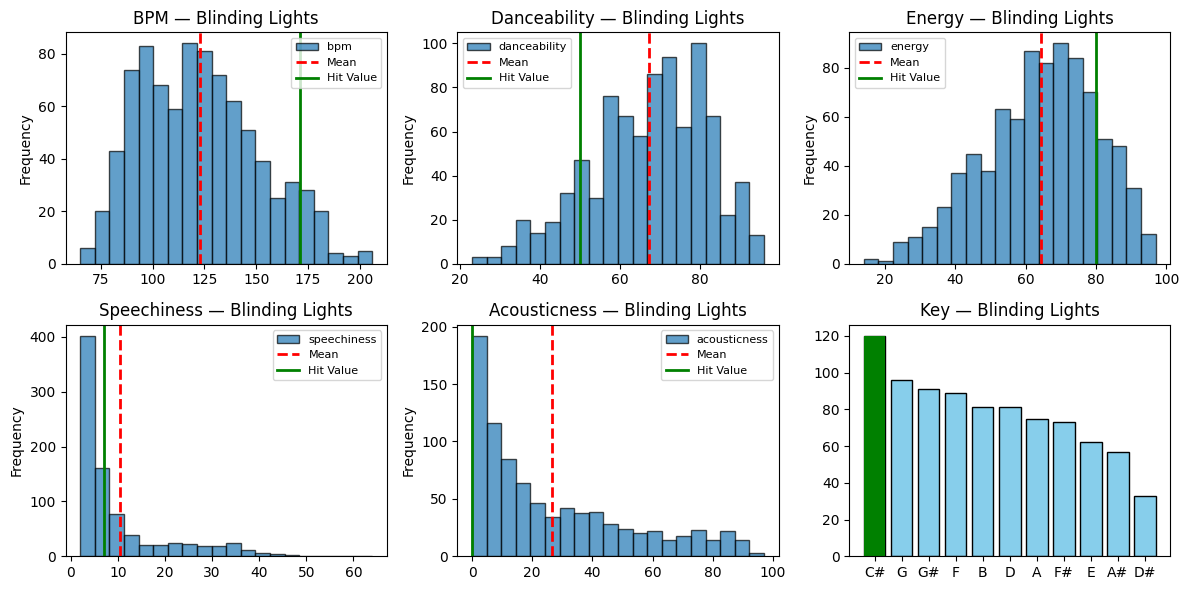

In [27]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
features = ['bpm', 'danceability', 'energy', 'speechiness', 'acousticness']
titles = ['BPM', 'Danceability', 'Energy', 'Speechiness', 'Acousticness']

for ax, feat, title in zip(axs.flat[:5], features, titles):
    df_clean[feat].plot(kind='hist', bins=20, ax=ax, alpha=0.7, edgecolor='black')
    ax.axvline(df_clean[feat].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    ax.axvline(big_hit[feat], color='green', linestyle='-', linewidth=2, label='Hit Value')
    ax.set_title(f"{title} — {big_hit['track_name']}")
    ax.legend(fontsize=8)

key_counts = df_clean['key'].value_counts()
axs.flat[5].bar(key_counts.index, key_counts.values, color='skyblue', edgecolor='black')
axs.flat[5].set_title(f"Key — {big_hit['track_name']}")
if big_hit['key'] in key_counts.index:
    hit_idx = list(key_counts.index).index(big_hit['key'])
    axs.flat[5].bar(key_counts.index[hit_idx], key_counts.values[hit_idx], color='green')

plt.tight_layout()
plt.show()

In [28]:
#AI Generated

dfc = df.dropna(subset=[c for c in needed if c in df.columns]).copy()

def iqr(series, lo=25, hi=75):
    qlo, qhi = np.nanpercentile(series, [lo, hi])
    return float(qlo), float(qhi)

crit = {
    'bpm':        iqr(dfc['bpm']),
    'dance':      iqr(dfc['danceability']),
    'energy':     iqr(dfc['energy']),
    'speech':     iqr(dfc['speechiness']),
    'acoustic':   iqr(dfc['acousticness']),
    'key':        (dfc['key'].mode().iat[0]  if not dfc['key'].mode().empty  else None),
    'mode':       (dfc['mode'].mode().iat[0] if not dfc['mode'].mode().empty else None),
}

# --- Find songs that meet ALL criteria ---
hits = dfc[
    (dfc['bpm'].between(*crit['bpm'])) &
    (dfc['danceability'].between(*crit['dance'])) &
    (dfc['energy'].between(*crit['energy'])) &
    (dfc['speechiness'].between(*crit['speech'])) &
    (dfc['acousticness'].between(*crit['acoustic'])) &
    (dfc['key'] == crit['key']) &
    (dfc['mode'] == crit['mode'])
].copy()

# --- Report results: artist/title + popularity indicators ---
cols = ['track_name','artist(s)_name','bpm','key','mode',
        'danceability','energy','speechiness','acousticness',
        'streams','in_spotify_charts','in_spotify_playlists']

hits_sorted = hits.sort_values('streams', ascending=False)[cols]

if hits_sorted.empty:
    print("\nNo songs match ALL criteria exactly. Consider widening ranges (e.g., 20th–80th percentiles).")
else:
    display(hits_sorted.head(20))

    # If you need just the artist/title list:
    at = hits_sorted[['artist(s)_name','track_name']].head(20)

    # Quick popularity verdicts for those shown:
    verdict = hits_sorted.head(20).assign(
        popular=lambda d: (d['streams'] >= d['streams'].median()) | (d['in_spotify_charts'] > 0)
    )[["artist(s)_name","track_name","streams","in_spotify_charts","in_spotify_playlists","popular"]]
    display(verdict)

,track_name,artist(s)_name,bpm,key,mode,danceability,energy,speechiness,acousticness,streams,in_spotify_charts,in_spotify_playlists
518,Need To Know,Doja Cat,130,C#,Major,66,61,7,30,1.042568e+09,0,6672
660,Ginseng Strip 2002,Yung Lean,115,C#,Major,60,71,4,8,2.407700e+08,0,4310


,artist(s)_name,track_name,streams,in_spotify_charts,in_spotify_playlists,popular
518,Doja Cat,Need To Know,1.042568e+09,0,6672,True
660,Yung Lean,Ginseng Strip 2002,2.407700e+08,0,4310,False
